<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/ElectricFieldLines_MultipleCharge_SequentiallyAdded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b> Electric Field Lines</h1></b>

Dr. Bingsen Wang

5/24/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
0


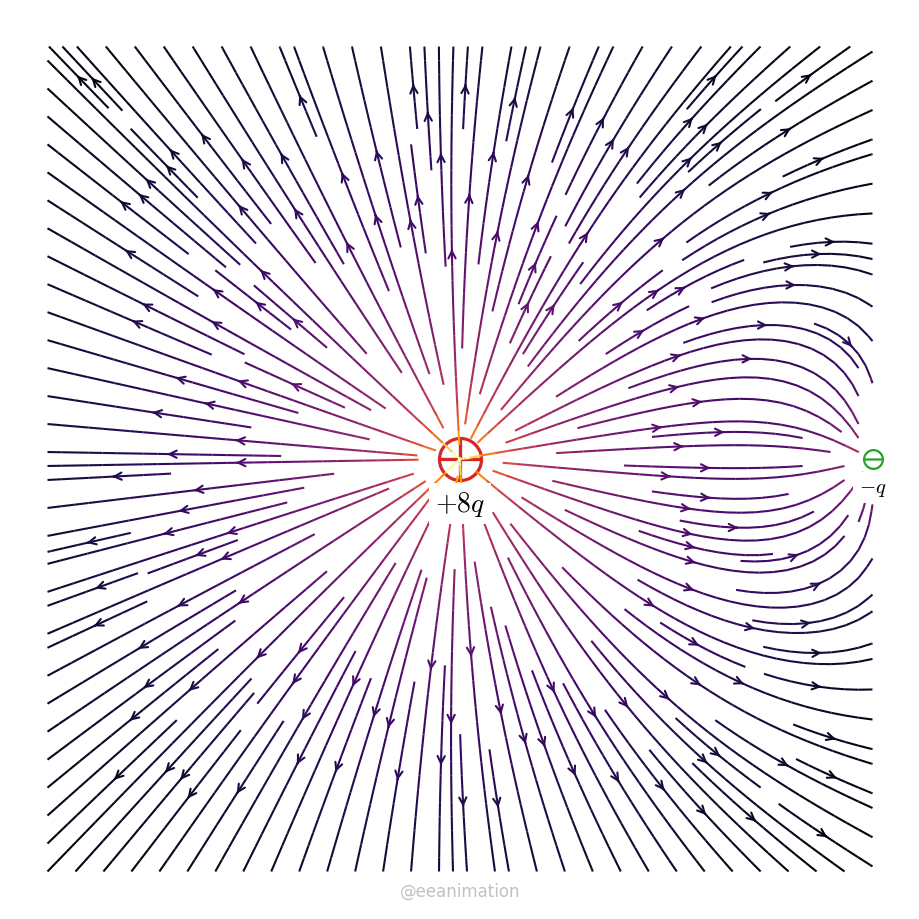

In [ ]:
from matplotlib import pyplot,cm,animation
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def E(q, r0, x, y):
  den = np.hypot(x-r0[0], y-r0[1])**3
  return q * (x - r0[0]) / den, q * (y - r0[1]) / den

Nf=60
nq=8 #number of negative charges
nx, ny = 100, 100
theta=np.linspace(0,np.pi/2,Nf)
r=[np.linspace([1.1,1.1*np.sqrt(2)][k],.6,Nf) for k in range(2)]
charges = []
x = np.linspace(-1.1, 1.1, nx)
y = np.linspace(-1.1, 1.1, ny)
X, Y = np.meshgrid(x, y)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.2])
ax1 = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.2],fc='none')
ax.axis('off')
# ax.text(0,1.05,"Electric Field Lines",size=35,ha='center')

ax.scatter(0, 0, color=cl[3], s=1000,marker=r'$\oplus$',zorder=3)
def animate(ii):
  xlim=ax1.get_xlim();ylim=ax1.get_ylim();ax1.cla();ax1.set_xlim(xlim);ax1.set_ylim(ylim);ax1.axis('off')
  if ii%50==0: print(ii)
  # ii=Nf
  i=ii%Nf; kk=ii//Nf
  Ex, Ey = E(8, (0, 0), X, Y)
  ax1.text(0, -.08, r'$+8q$',size=20,ha='center',va='top',bbox=dict(facecolor='w',alpha=1, edgecolor='none'))
  # for k in range(kk):
  t=np.pi*2/nq*kk;rx,ry=r[kk%2][i]*np.cos(t),r[kk%2][i]*np.sin(t)
  ex,ey=E(-1, (rx, ry), X, Y);  Ex += ex;Ey += ey
  ax1.scatter(rx, ry, color='w', s=500,marker='o',zorder=3)
  ax1.scatter(rx, ry, color=cl[2], s=200,marker=r'$\ominus$',zorder=3)
  ax1.text(rx, ry-.05, r'$-q$',size=15,ha='center',va='top',bbox=dict(facecolor='w',alpha=1, edgecolor='none'))
  if kk>0:
    for k in range(kk):
      t=np.pi*2/nq*k;rx,ry=.6*np.cos(t),.6*np.sin(t)
      ex,ey=E(-1, (rx, ry), X, Y);Ex += ex;Ey += ey
      ax1.scatter(rx, ry, color='w', s=500,marker='o',zorder=3)
      ax1.scatter(rx, ry, color=cl[2], s=200,marker=r'$\ominus$',zorder=3)
      ax1.text(rx, ry-.05, r'$-q$',size=15,ha='center',va='top',bbox=dict(facecolor='w',alpha=1, edgecolor='none'))

  color = 2*np.log(np.hypot(Ex, Ey))
  ax1.streamplot(X, Y, Ex, Ey,color=color, density=2, arrowstyle='->', arrowsize=1.3,linewidth=1.5,cmap=cm.inferno)
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf*8, interval=20)
anim.save("9chargeElectricField.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)